In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**numpy.cumsum(a, axis=None, dtype=None, out=None)**

Return the cumulative sum of the elements along a given axis.

**numpy.linspace**

numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)

Return evenly spaced numbers over a specified interval.

Returns num evenly spaced samples, calculated over the interval [start, stop].

The endpoint of the interval can optionally be excluded.

In [ ]:
x = np.linspace(0,10,500)
y = np.cumsum(np.random.randn(500,6),0)

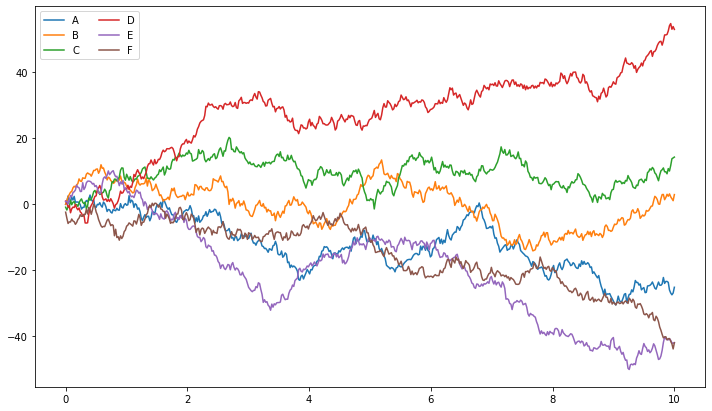

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(x,y)
plt.legend('ABCDEF',ncol=2, loc='upper left')

**Interacting with Data**

In [66]:
import requests
import pandas as pd

In [22]:
url = ('http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en/nama_10_gdp?geo=EU28&precision=1&na_item=B1GQ&unit=CP_MEUR&time=2010&time=2011')
print(url)

http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en/nama_10_gdp?geo=EU28&precision=1&na_item=B1GQ&unit=CP_MEUR&time=2010&time=2011


In [23]:
# Make a get request to the url
response = requests.get(url)

In [24]:
print(f"Request returned {response.status_code} : '{response.reason}'")

Request returned 200 : 'OK'


In [25]:
payload = response.json()

In [34]:
import pprint 
pp = pprint.PrettyPrinter(indent=1)
pp.pprint(payload)

{'class': 'dataset',
 'dimension': {'geo': {'category': {'index': {'EU28': 0},
                                    'label': {'EU28': 'European Union - 28 '
                                                      'countries (2013-2020)'}},
                       'label': 'geo'},
               'na_item': {'category': {'index': {'B1GQ': 0},
                                        'label': {'B1GQ': 'Gross domestic '
                                                          'product at market '
                                                          'prices'}},
                           'label': 'na_item'},
               'time': {'category': {'index': {'2010': 0, '2011': 1},
                                     'label': {'2010': '2010', '2011': '2011'}},
                        'label': 'time'},
               'unit': {'category': {'index': {'CP_MEUR': 0},
                                     'label': {'CP_MEUR': 'Current prices, '
                                                        

In [35]:
dir(response)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

In [36]:
payload['value']

{'0': 12852509.5, '1': 13236804.7}

In [37]:
list(zip(payload['id'], payload['size']))

[('unit', 1), ('na_item', 1), ('geo', 1), ('time', 2)]

In [42]:
list_of_keys = []
for k in payload['id']:
  list_of_keys.append(
      payload['dimension'][k]['category']['index'].keys()
  )
  print(list_of_keys)

[dict_keys(['CP_MEUR'])]
[dict_keys(['CP_MEUR']), dict_keys(['B1GQ'])]
[dict_keys(['CP_MEUR']), dict_keys(['B1GQ']), dict_keys(['EU28'])]
[dict_keys(['CP_MEUR']), dict_keys(['B1GQ']), dict_keys(['EU28']), dict_keys(['2010', '2011'])]


In [43]:
index = pd.MultiIndex.from_product(
    list_of_keys, names = payload['id']
)
index

MultiIndex([('CP_MEUR', 'B1GQ', 'EU28', '2010'),
            ('CP_MEUR', 'B1GQ', 'EU28', '2011')],
           names=['unit', 'na_item', 'geo', 'time'])

In [45]:
df = pd.DataFrame(payload['value'].values(), index=index, columns=['value'])
df

value
unit    na_item geo  time            
CP_MEUR B1GQ    EU28 2010  12852509.5
                     2011  13236804.7

In [69]:
from google.colab import files
uploaded = files.upload()

Saving cryptos.xlsx to cryptos (1).xlsx


In [75]:
link = 'https://docs.google.com/spreadsheets/d/1Dm7SGWM2Aq5_WeWyi6xHSIt3Ag_oRgIQ/edit#gid=284471923'

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [79]:
df = pd.read_excel('/content/drive/MyDrive/cryptos.xlsx')
df

,CloseTime,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
0,2019-03-20 14:00:00,3998.64,4002.52,3993.50,3998.00,173.321628,6.928502e+05
1,2019-03-20 15:00:00,3998.83,4004.95,3993.00,4004.95,347.431239,1.388839e+06
2,2019-03-20 16:00:00,4006.00,4008.00,3992.00,3998.85,232.962893,9.317110e+05
3,2019-03-20 17:00:00,3998.84,4021.02,3994.84,4002.50,781.703067,3.138661e+06
4,2019-03-20 18:00:00,4001.56,4005.41,3992.97,3998.60,171.735476,6.867960e+05
...,...,...,...,...,...,...,...
165,2019-03-27 11:00:00,3984.90,4031.03,3984.90,4013.00,1493.134507,5.991150e+06
166,2019-03-27 12:00:00,4013.00,4036.43,4005.68,4024.80,826.688225,3.325904e+06
167,2019-03-27 13:00:00,4024.80,4027.35,4007.00,4010.09,430.823688,1.730440e+06
168,2019-03-27 14:00:00,4010.05,4015.62,4002.93,4012.00,533.581436,2.138701e+06


In [81]:
# The code doesn't work 
df = pd.read_excel('/content/cryptos.xlsx')

ValueError: ignored